<a href="https://colab.research.google.com/github/rakshaa2000/30-Days-of-ML/blob/main/Wine_Quality_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project classifies wine of "quality" greater than 7 as "good" quality wine and less than 7 as "bad" quality.

This imports the necessary libraries for the execution of linear regression on the dataset.

In [1]:
# importing necessary libraries
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.svm import SVC  
from sklearn.naive_bayes import GaussianNB 

The code below helps us to import the dataset from Local Computer to Google Colab

In [2]:
from google.colab import files
uploaded = files.upload()

Saving wineQualityRed_train.csv to wineQualityRed_train (1).csv
Saving wineQualityRed_test.csv to wineQualityRed_test (1).csv


The training and test dataset are different. We first read and format the training data set.

In [3]:
features =["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
df = pd.read_csv('wineQualityRed_train.csv', sep=';', names=features, header=0)
df = pd.DataFrame(df)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,10.6,0.28,0.39,15.5,0.069,6.0,23.0,1.0026,3.12,0.66,9.2,5
1,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.9964,3.15,0.92,11.7,8
2,10.6,0.36,0.59,2.2,0.152,6.0,18.0,0.9986,3.04,1.05,9.4,5
3,10.6,0.36,0.60,2.2,0.152,7.0,18.0,0.9986,3.04,1.06,9.4,5
4,10.6,0.44,0.68,4.1,0.114,6.0,24.0,0.9970,3.06,0.66,13.4,6


We now label the wines with quality less than 7 as bad and greater than or equal to 7 as good.

In [4]:
bins = [0,6,10]
labels= ['bad','good']
df['quality']=pd.cut(df['quality'],bins=bins, labels=labels)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,10.6,0.28,0.39,15.5,0.069,6.0,23.0,1.0026,3.12,0.66,9.2,bad
1,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.9964,3.15,0.92,11.7,good
2,10.6,0.36,0.59,2.2,0.152,6.0,18.0,0.9986,3.04,1.05,9.4,bad
3,10.6,0.36,0.60,2.2,0.152,7.0,18.0,0.9986,3.04,1.06,9.4,bad
4,10.6,0.44,0.68,4.1,0.114,6.0,24.0,0.9970,3.06,0.66,13.4,bad


We encode the label into two values, 0 and 1.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


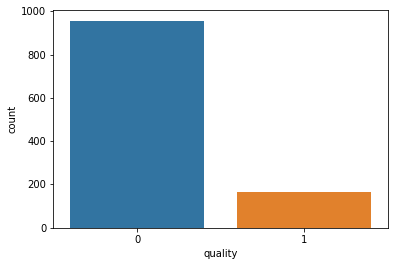

In [5]:
le = LabelEncoder()
df['quality'] = le.fit_transform(df.quality)
sns.countplot(df['quality'])

We now format the test dataset to assess the accuracy in the model. Just like the training dataset, the test dataset is also labelled and encoded.

In [6]:
df_test = pd.read_csv('wineQualityRed_test.csv', sep=';', names=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"], header=0)
df_test = pd.DataFrame(df_test)
bins = [0,6,10]
labels= ['bad','good']
df_test['quality']=pd.cut(df_test['quality'],bins=bins, labels=labels)
df_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,bad


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


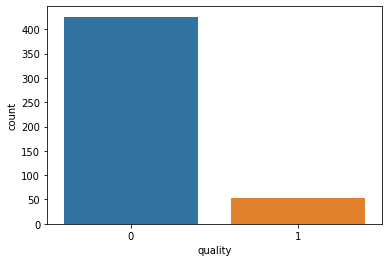

In [7]:
le = LabelEncoder()
df_test['quality'] = le.fit_transform(df_test.quality)
sns.countplot(df_test['quality'])

In [8]:
features = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
X_train = df[features]
X_test = df_test[features]
Y_train = np.array(df['quality'])
Y_test = np.array(df_test['quality'])

#Standardise data for better results

scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.fit_transform(X_test)

**Prediction with Logistic Regression** \
Prediction of Wine Quality with Logistic Regression.

In [9]:
regressor=LogisticRegression(solver='saga', multi_class='multinomial',max_iter=1000)
reg = regressor.fit(X_train,Y_train)
y_pred = regressor.predict(X_test)
score=accuracy_score(Y_test,y_pred)

# Printing coefficients and intercept
print('Coefficients:')
for i in range (0,len(features)):
  print(features[i],": ",reg.coef_[0][i])
print('\nIntercept: ', reg.intercept_[0])
print('\nConfusion matrix of the model (Logistic Regression):')
print(confusion_matrix(Y_test,y_pred))
metrics = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
print('\nPrecision: ', metrics[0])
print('Recall: ', metrics[1])
print('F1-score: ', metrics[2])
print('Accuracy: ', accuracy_score(Y_test,y_pred))

Coefficients:
fixed acidity :  0.22506525317759046
volatile acidity :  -0.29092221280770797
citric acid :  0.06687630492691565
residual sugar :  0.19238881655025336
chlorides :  -0.19729382441276158
free sulfur dioxide :  0.028361527792469657
total sulfur dioxide :  -0.24458752854121682
density :  -0.3371437320552202
pH :  -0.015459516253873202
sulphates :  0.3490057763947299
alcohol :  0.3719081605464618

Intercept:  -1.4458272980665188

Confusion matrix of the model (Logistic Regression):
[[412  14]
 [ 41  13]]

Precision:  0.8613410596026491
Recall:  0.8854166666666666
F1-score:  0.8680792567311337
Accuracy:  0.8854166666666666


**Prediction with SVM** \
Prediction of Wine Quality with Support Vector Machines.

In [10]:
svclassifier = SVC(kernel='linear')
svm = svclassifier.fit(X_train,Y_train)
y_pred = svclassifier.predict(X_test)

# Printing coefficients and intercept
print('Coefficients:')
for i in range (0,len(features)):
  print(features[i],": ",svm.coef_[0][i])
print('\nIntercept:', svm.intercept_[0])
print('\nConfusion matrix of the model (Support Vector Machines):')
print(confusion_matrix(Y_test,y_pred))
metrics = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
print('\nPrecision: ', metrics[0])
print('Recall: ', metrics[1])
print('F1-score: ', metrics[2])
print('Accuracy: ', accuracy_score(Y_test,y_pred))

Coefficients:
fixed acidity :  0.4040857941994478
volatile acidity :  -0.3065111271346064
citric acid :  0.04101400040584291
residual sugar :  0.2696414767495088
chlorides :  -0.27602558976006775
free sulfur dioxide :  -0.039804442459313916
total sulfur dioxide :  -0.2294851315429965
density :  -0.5152977166271234
pH :  0.07736316272094063
sulphates :  0.5296294754596105
alcohol :  0.4511139563629134

Intercept: -1.9665986360525547

Confusion matrix of the model (Support Vector Machines):
[[411  15]
 [ 46   8]]

Precision:  0.8372978308438779
Recall:  0.8729166666666667
F1-score:  0.8495657513494432
Accuracy:  0.8729166666666667


**Prediction with Naive Bayes** \
Prediction of Wine Quality with Naive Bayes Algorithm.

In [11]:
gnb = GaussianNB() 
gauss_nb = gnb.fit(X_train,Y_train)
y_pred = gnb.predict(X_test)
score=accuracy_score(Y_test,y_pred)

# Printing coefficients and intercept
print('Confusion matrix of the model (Gaussian Naive Bayes Algorithm):')
print(confusion_matrix(Y_test,y_pred))
metrics = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
print('\nPrecision: ', metrics[0])
print('Recall: ', metrics[1])
print('F1-score: ', metrics[2])
print('Accuracy: ', accuracy_score(Y_test,y_pred))

Confusion matrix of the model (Gaussian Naive Bayes Algorithm):
[[374  52]
 [ 27  27]]

Precision:  0.866192509233246
Recall:  0.8354166666666667
F1-score:  0.8483973688756354
Accuracy:  0.8354166666666667


In [12]:
regressor = LinearRegression()
reg = regressor.fit(X_train,Y_train)
y_pred1 = regressor.predict(X_test)
y_pred = np.array(y_pred1>=0.36)
score=accuracy_score(Y_test, y_pred)

# Printing coefficients and intercept
print('Coefficients:')
for i in range (0,len(features)):
  print(features[i],": ",reg.coef_[i])
print('\nIntercept:', reg.intercept_)
metrics = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
print('\nConfusion matrix of the model (Linear Regression as classifier):')
print(confusion_matrix(Y_test,y_pred))
print('\nPrecision: ', metrics[0])
print('Recall: ', metrics[1])
print('F1-score: ', metrics[2])
print('Accuracy: ', accuracy_score(Y_test,y_pred))

Coefficients:
fixed acidity :  0.053783678579035335
volatile acidity :  -0.0401540050557387
citric acid :  0.018841412598512006
residual sugar :  0.03766268824000333
chlorides :  -0.03079603877275898
free sulfur dioxide :  -0.010202121267529582
total sulfur dioxide :  -0.013970619303101069
density :  -0.08146262717138804
pH :  -0.00458238622180183
sulphates :  0.06586181797404798
alcohol :  0.07224953646366167

Intercept: 0.14566577301161662

Confusion matrix of the model (Linear Regression as classifier):
[[395  31]
 [ 34  20]]

Precision:  0.8612796517208282
Recall:  0.8645833333333334
F1-score:  0.8628863826232248
Accuracy:  0.8645833333333334
